### Decsion Trees
A file to explore applicaitons of Decision Tree Classifiers for predicting the winner of a fight

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p= p+'UFCdata.csv'
p

'C:\\Users\\walkowae\\Documents\\GitHub\\UFCdata.csv'

In [4]:
df = pd.read_csv(p)
df.head(3)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0


In [5]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.head()

Index(['B_draw', 'R_draw'], dtype='object')


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0
3,Aaron Riley,Joe Brammer,Steve Mazzagatti,5/29/2010,"Las Vegas, Nevada, USA",Red,False,Lightweight,0.0,0.0,...,2,0,0,0,Southpaw,172.72,175.26,155.0,26.0,29.0
4,Aaron Riley,Shane Nelson,Kevin Mulhall,8/8/2009,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,0.5,0.0,...,1,0,0,0,Southpaw,172.72,175.26,155.0,24.0,28.0


In [6]:
print(df.shape)
df = df.dropna()
df.shape

(6012, 142)


(3890, 142)

In [7]:
y = df.Winner
df = df.drop('Winner', axis = 1)
X_category = df.select_dtypes(exclude=np.number)
X_numerical = df.select_dtypes(include=np.number)

print(X_category.columns)
X_numerical.head(3)

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout',
       'weight_class', 'B_Stance', 'R_Stance'],
      dtype='object')


,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
1,0.0,0.0,0.250,0.55,0.00,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,175.26,180.34,135.0,27.0,25.0
2,0.0,1.0,0.535,0.47,0.13,0.0,0.0,0.0,0.0,0.0,...,0,3,0,0,0,172.72,175.26,155.0,31.0,32.0
4,0.5,0.0,0.360,0.36,0.15,0.5,1.0,0.0,0.0,0.0,...,0,1,0,0,0,172.72,175.26,155.0,24.0,28.0


In [8]:


X_num = X_numerical


X_num = (X_num - X_num.mean())/X_num.std()
print(X_num.isnull().sum().sum())


0


In [9]:
X_cat = X_category.drop(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout'],axis=1)
X_cat=pd.get_dummies(X_cat)
print(X_cat.isnull().sum().sum())

0


In [12]:
X = pd.concat([X_num,X_cat],axis =1)
X.head(3)

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
1,-0.690263,-0.560499,-1.704518,1.003821,-1.119503,2.970785,-0.671011,1.041472,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
2,-0.690263,2.696667,0.666250,0.346643,-0.626459,-1.027669,-0.671011,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
4,0.616173,-0.560499,-0.789485,-0.556977,-0.550606,0.971558,0.761297,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0


In [14]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

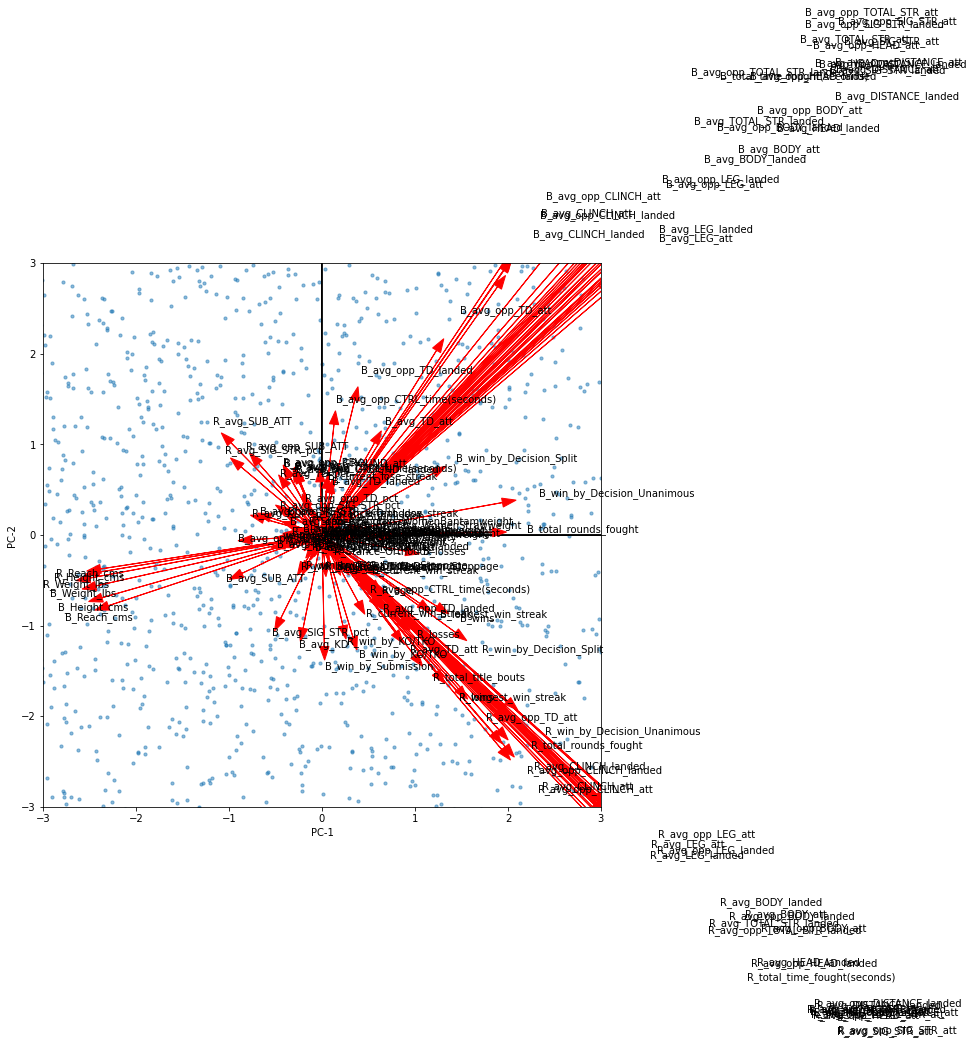

In [23]:
PVE = biplot(X,153,1,2,scale=30,alpha=.5,s=10)

In [31]:
important = ['B_avg_opp_GROUND_landed' ,'B_Height_cms' ,'R_age' ,'B_age',
 'B_avg_SIG_STR_att', 'R_avg_opp_HEAD_landed']
Ximp = X.filter(important,axis=1)
Ximp.head(3)

,B_avg_opp_GROUND_landed,B_Height_cms,R_age,B_age,B_avg_SIG_STR_att,R_avg_opp_HEAD_landed
1,0.254956,-0.130310,-1.258810,-0.702540,-1.062626,0.446185
2,0.007713,-0.719735,0.425417,0.292501,-0.424651,0.114389
4,-0.404359,-0.425023,-0.536998,-1.448821,-1.160776,0.030294


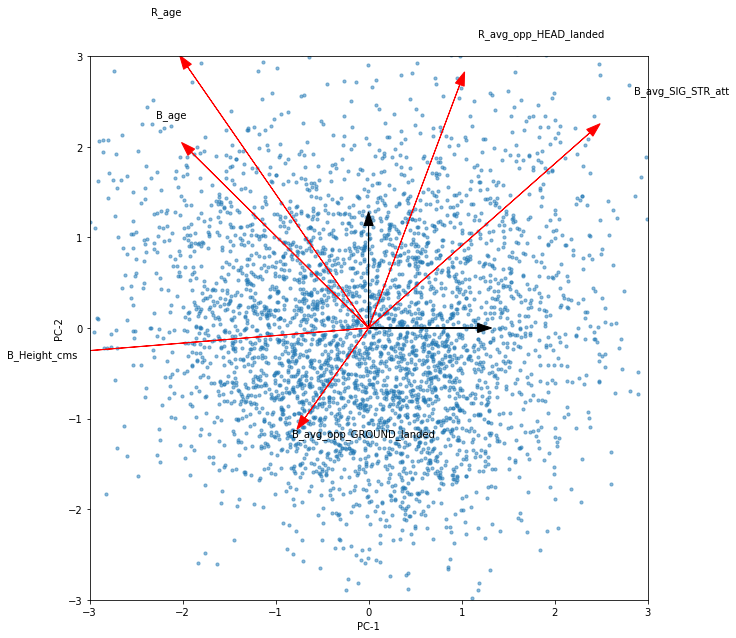

In [33]:
PVE = biplot(Ximp,6,1,2,scale=5,alpha=.5,s=10)